In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
store = pd.read_csv("input/store.csv")

/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_sales = train[train['Sales'] != 0]

In [4]:
train_sales['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [3]:
train.info()
print('-------------------------------------------')
test.info()
print('-------------------------------------------')
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64

## Sales and Customers Genernal Analysis

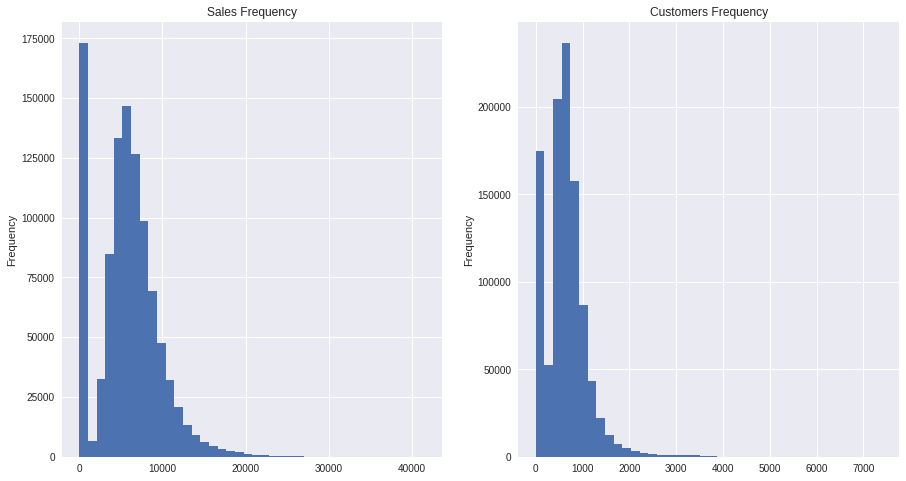

In [10]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))

train['Sales'].plot(kind='hist', bins=40, ax=axis1,title='Sales Frequency')
train['Customers'].plot(kind='hist', bins=40, ax=axis2, title='Customers Frequency')

In [6]:
# possible outliers
sales_0_df = train[train['Sales'] == 0]
sales_not_0_df = train[train['Sales'] != 0]

print("Sales = 0 and store closed: {}".format(len(sales_0_df[sales_0_df['Open'] == 0])))

print("Sales = 0 and store opened: {}".format(len(sales_0_df[sales_0_df['Open'] == 1])))

print("Sales > 0 and store closed: {}".format(len(sales_not_0_df[sales_not_0_df['Open'] == 0])))

print("Sales > 0 and store opened: {}".format(len(sales_not_0_df[sales_not_0_df['Open'] == 1])))

Sales = 0 and store closed: 172817
Sales = 0 and store opened: 54
Sales > 0 and store closed: 0
Sales > 0 and store opened: 844338


In [7]:
train[(train['Sales'] == 0) & (train['Open'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


**Analysis**: there are 54 records in the train dataframe where the store is open but sales and customers are both 0. we assume that this may be a record error. 

In [8]:
print(train[train['Sales'] > 20000].shape[0])
print(train[train['Sales'] > 25000].shape[0])
print(train[train['Sales'] > 30000].shape[0])
print(train[train['Sales'] > 35000].shape[0])
print(train[train['Sales'] > 40000].shape[0])

4099
758
153
18
1


**Analysis**:there are only 19 records whose sales values are greater than 35000, so these records can be ignored to avoid overfitting.

## Date Related Analysis 

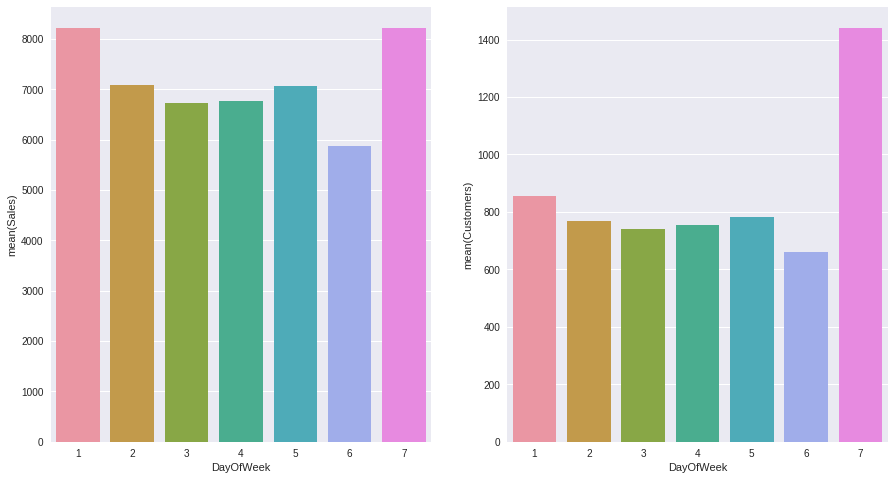

In [9]:
# weekly analysis 
# average sales and customers for open stores by day of week
train_open_df = train[train['Open'] == 1]

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="DayOfWeek", y="Sales", data=train_open_df, order=[1, 2, 3, 4, 5, 6, 7], ax=axis1, ci=None)
sns.barplot(x="DayOfWeek", y="Customers", data=train_open_df, order=[1, 2, 3, 4, 5, 6, 7], ax=axis2, ci=None)

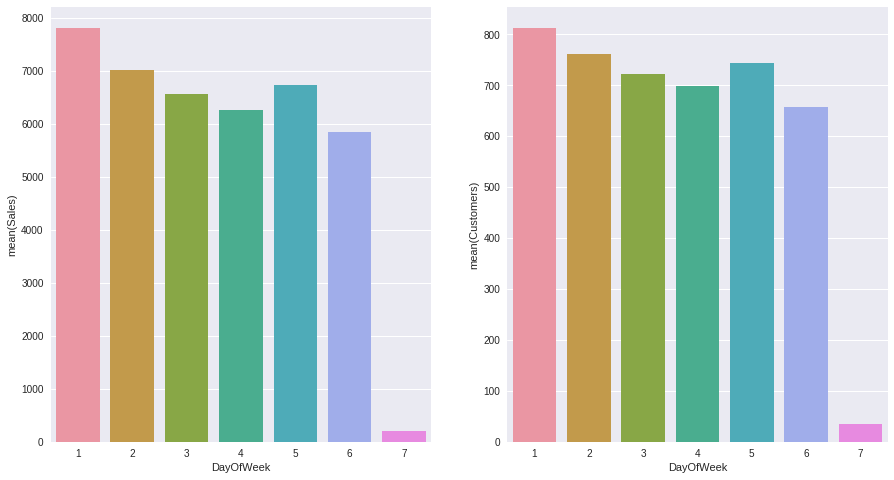

In [15]:
# average sales and customers by Day of Week

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="DayOfWeek", y="Sales", data=train, order=[1, 2, 3, 4, 5, 6, 7], ax=axis1, ci=None)
sns.barplot(x="DayOfWeek", y="Customers", data=train, order=[1, 2, 3, 4, 5, 6, 7], ax=axis2, ci=None)

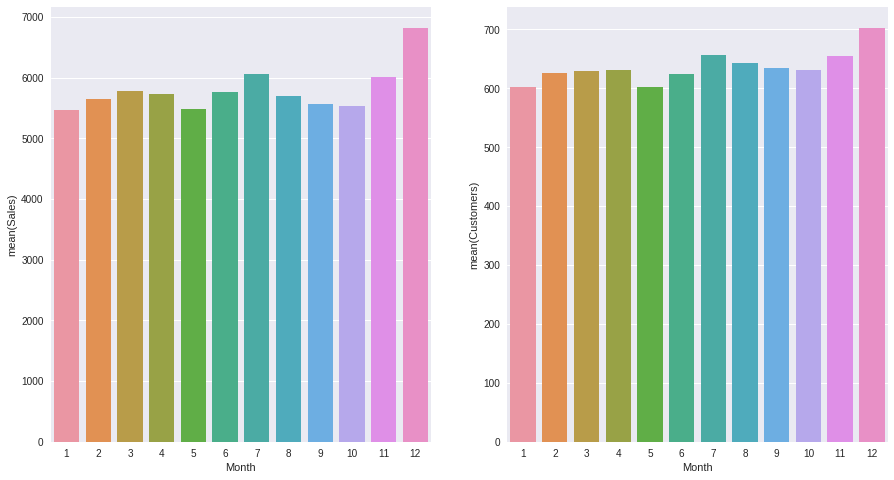

In [16]:
# monthly analysis
# average sales and customers by month
train["Year"] = train["Date"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d").year)
train["Month"] = train["Date"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d").month)
train["Day"] = train["Date"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d").day)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Month", y="Sales", data=train, ax=axis1, ci=None)
sns.barplot(x="Month", y="Customers", data=train, ax=axis2, ci=None)

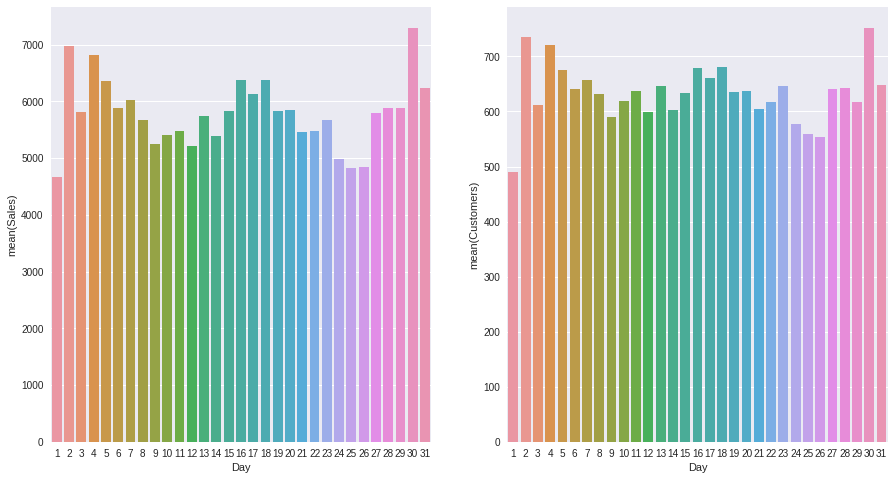

In [17]:
# average sales and customers by day of month
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Day", y="Sales", data=train, ax=axis1, ci=None)
sns.barplot(x="Day", y="Customers", data=train, ax=axis2, ci=None)

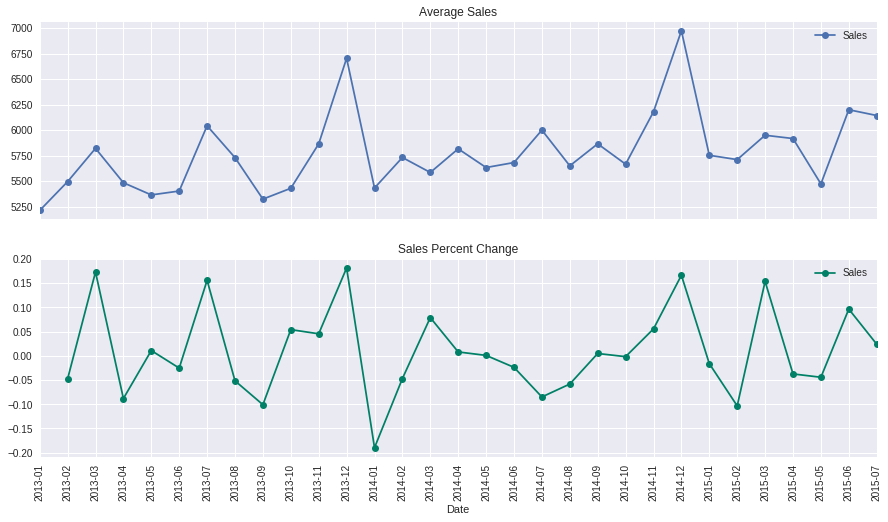

In [18]:
# assign Date column to Date(Y-M) instead of Y-M-D
train['Date'] = train['Date'].apply(lambda x: (str(x)[:7]))

# group by date and get average sales and percent change
average_sales = train.groupby('Date')['Sales'].mean()
pct_change_sales = train.groupby('Date')['Sales'].sum().pct_change()

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(15,8))

#plot average sales over time(Y-M)
a1 = average_sales.plot(legend=True, ax=ax1, marker='o', title='Average Sales')
a1.set_xticks(range(len(average_sales)))
a1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot percent change for sales over time
ax2 = pct_change_sales.plot(legend=True, ax=ax2, marker='o', rot=90, colormap='summer', title='Sales Percent Change')

## Effect of Promo

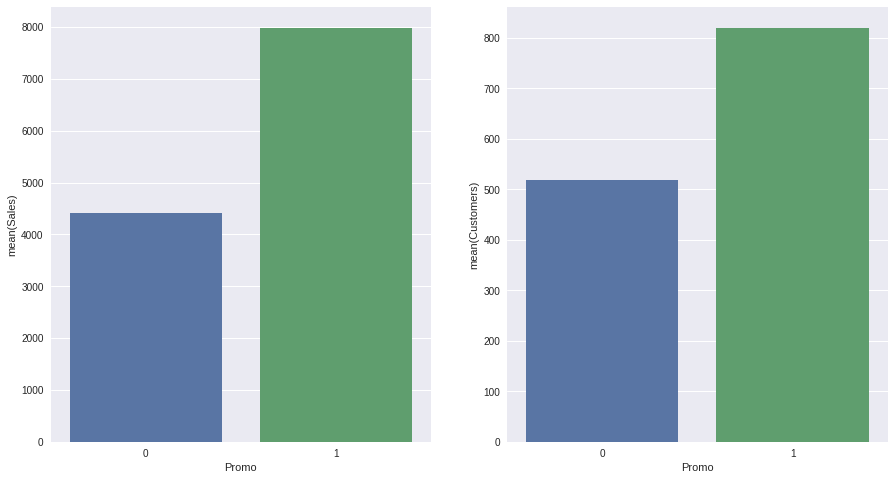

In [19]:
# average sales and customers by Promo
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Promo", y="Sales", data=train, ax=axis1, ci=None)
sns.barplot(x="Promo", y="Customers", data=train, ax=axis2, ci=None)

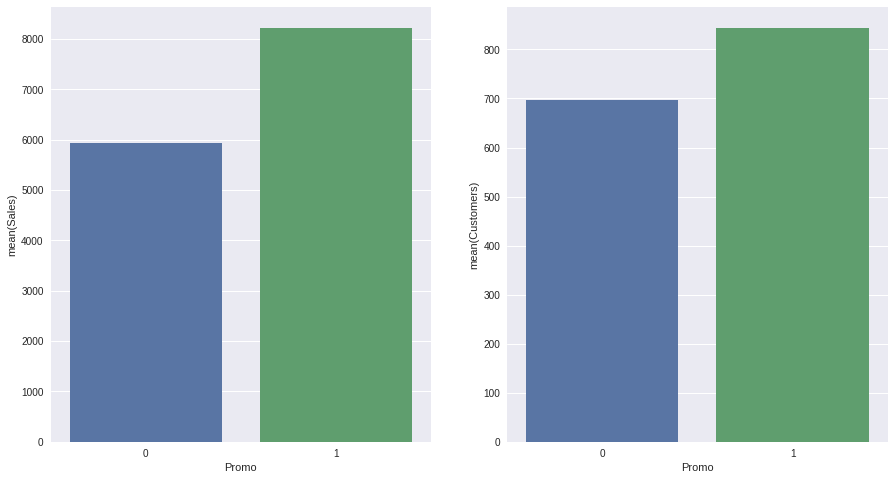

In [20]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Promo", y="Sales", data=train_open_df, ax=axis1, ci=None)
sns.barplot(x="Promo", y="Customers", data=train_open_df, ax=axis2, ci=None)

## Effect of Holidays

/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


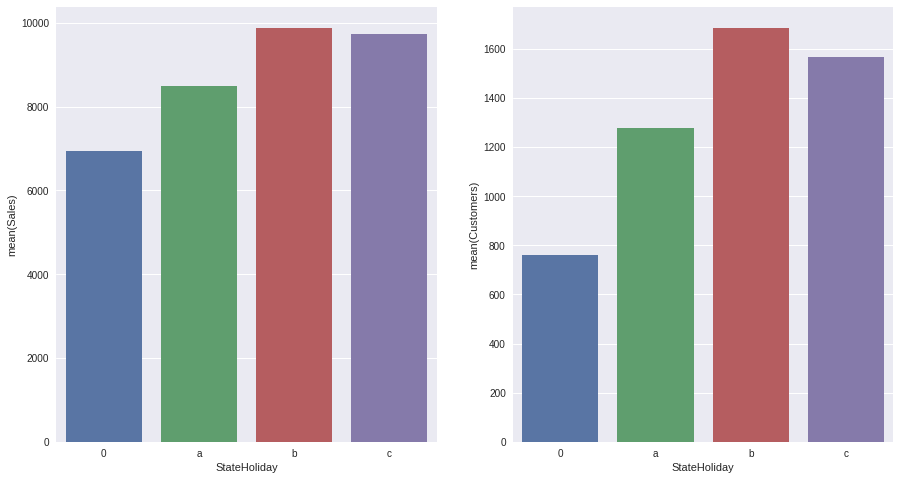

In [22]:
# convert some number 0s in column 'StateHoliday' to str
# average sales and customers for open stores by statehoiday
train_open_df['StateHoliday'] = train_open_df['StateHoliday'].astype(str)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="StateHoliday", y="Sales", data=train_open_df, ax=axis1, ci=None)
sns.barplot(x="StateHoliday", y="Customers", data=train_open_df, ax=axis2, ci=None)

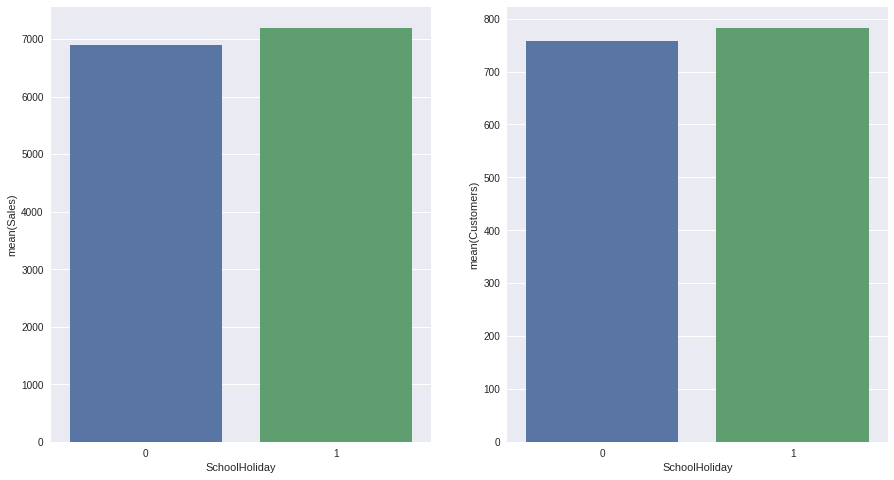

In [23]:
# average sales and customers for open stores by school holiday
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="SchoolHoliday", y="Sales", data=train_open_df, ax=axis1, ci=None)
sns.barplot(x="SchoolHoliday", y="Customers", data=train_open_df, ax=axis2, ci=None)

## Effect of Competition

In [25]:
# Add "AvgSales" & "AvgCustomers" columns to store_df
avg_sales_customers = train_open_df.groupby("Store")[["Sales", "Customers"]].mean()
avg_sales_customers_df = pd.DataFrame({"Store": avg_sales_customers.index, "AvgSales": avg_sales_customers["Sales"], "AvgCustomers": avg_sales_customers["Customers"]}, columns=["Store", "AvgSales", "AvgCustomers"])
store_merged = pd.merge(avg_sales_customers_df, store, on="Store")

# Add "AvgSalesPerCustomer" column to store_df
store_total_sales = train.groupby([train["Store"]])["Sales"].sum()
store_total_custs = train.groupby([train["Store"]])["Customers"].sum()
store_sales_percust = store_total_sales / store_total_custs
store_merged = pd.merge(store_merged, store_sales_percust.reset_index(name="AvgSalesPerCustomer"), on="Store")

In [26]:
store_merged

,Store,AvgSales,AvgCustomers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSalesPerCustomer
0,1,4759.096031,564.049936,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,8.437366
1,2,4953.900510,583.998724,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8.482725
2,3,6942.568678,750.077022,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9.255808
3,4,9638.401786,1321.752551,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,7.292138
4,5,4676.274711,537.340180,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,8.702634
5,6,5509.946154,635.234615,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN,8.673876
6,7,8817.050891,948.561069,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,9.295185
7,8,5539.358418,658.197704,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,8.415949
8,9,6562.337612,579.816431,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,11.317957
9,10,5568.420918,593.955357,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN,9.375151


In [27]:
# Fill NaN values in store_merged for 'CompetitionDistance' with 0
store_merged['CompetitionDistance'].fillna(0, inplace=True)

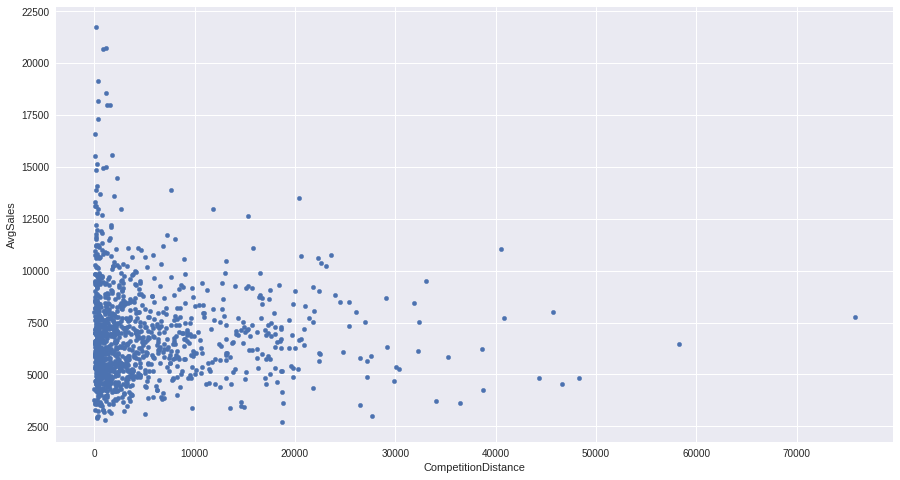

In [29]:
store_merged.plot(kind='scatter', x='CompetitionDistance', y='AvgSales', figsize=(15,8))

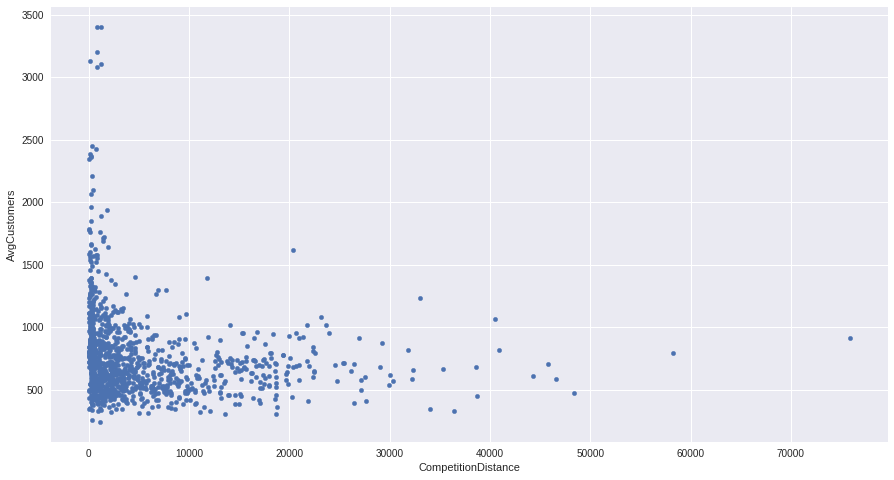

In [30]:
store_merged.plot(kind='scatter', x='CompetitionDistance', y='AvgCustomers', figsize=(15,8))

## Effect of Store Type and Assortment Type

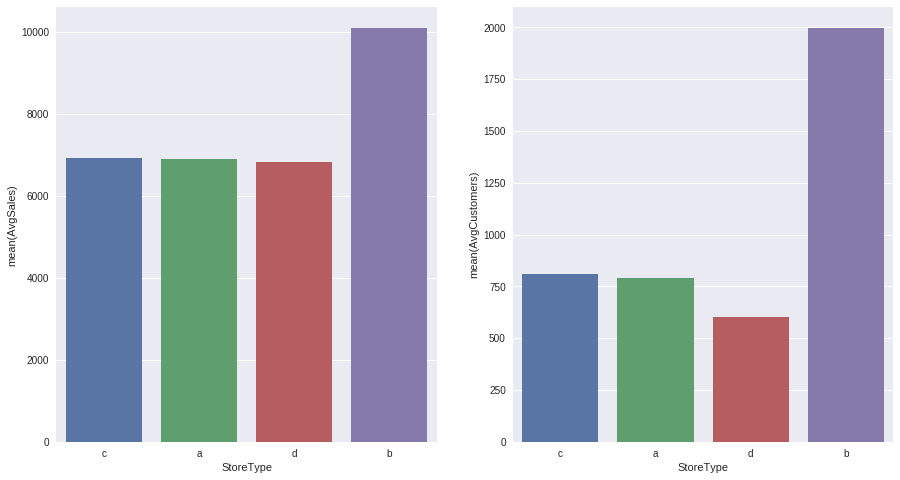

In [32]:
# average sales and customers for open stores by storetype
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="StoreType", y="AvgSales", data=store_merged, ax=axis1, ci=None)
sns.barplot(x="StoreType", y="AvgCustomers", data=store_merged, ax=axis2, ci=None)

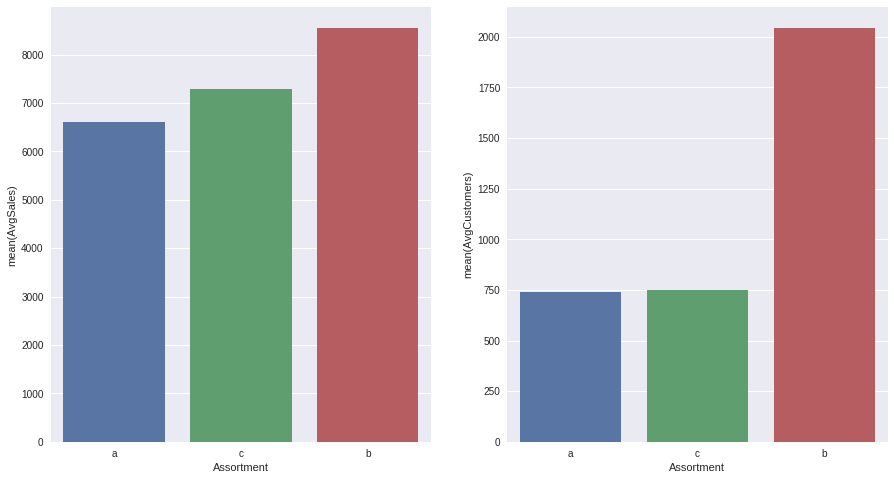

In [33]:
# average sales and customers for open stores by assortment type
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Assortment", y="AvgSales", data=store_merged, ax=axis1, ci=None)
sns.barplot(x="Assortment", y="AvgCustomers", data=store_merged, ax=axis2, ci=None)

## Correlation Matrix of Features

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5]), <a list of 20 Text xticklabel objects>)

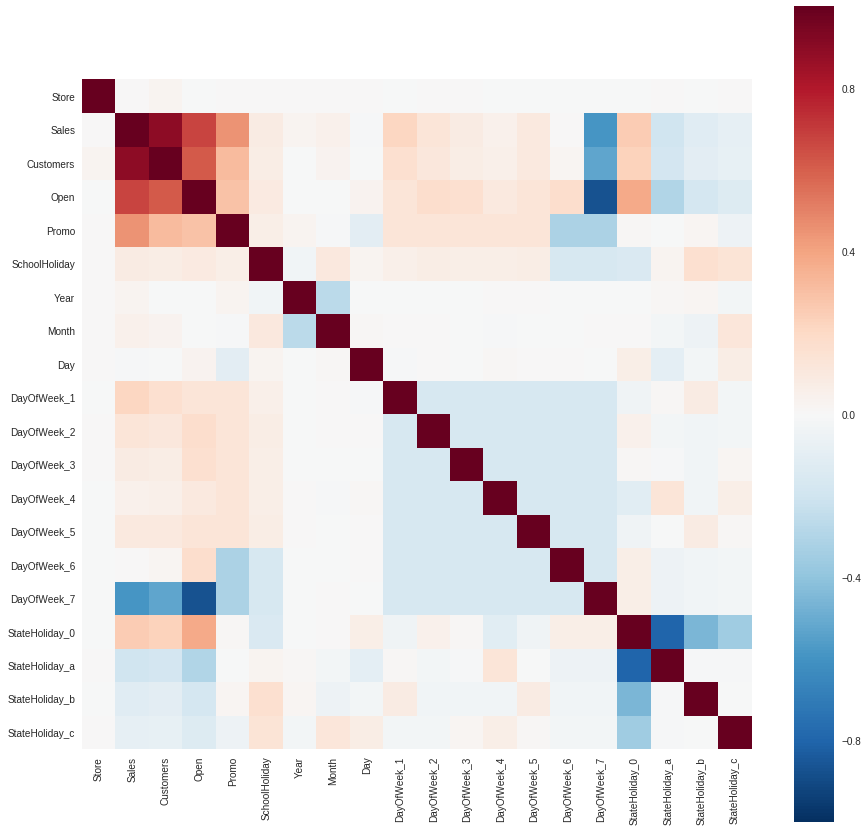

In [34]:
# One-hot encoding of "DayOfWeek" & "StateHoliday" columns
train = pd.get_dummies(train, columns=["DayOfWeek", "StateHoliday"])

# Generate correlation matrix for training_df
corr = train.corr()
fig, (axis1) = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square=True, ax=axis1)
plt.yticks(rotation=0)
plt.xticks(rotation=90)